In [103]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
# Loading the dataset 
dataset = pd.read_csv("MD_agric_exam-4313.csv")
dataset.head()

,Field_ID,Elevation,Rainfall,Min_temperature_C,Max_temperature_C,pH,Pollution_level,Plot_size,Annual_yield,Crop_type
0,1162,494.95615,1507.6,-5.4,31.0,6.859436,0.007034,3.6,1.617421,coffee
1,5108,663.73390,581.0,-4.7,30.9,5.603219,0.289643,4.2,2.532497,potato
2,3504,396.87990,1715.1,-6.1,31.7,5.774116,0.000409,2.6,1.262207,banana
3,5351,594.80370,1748.0,-4.3,33.6,6.477415,0.088777,7.9,4.351564,wheat
4,905,609.49800,1395.8,-4.5,31.3,5.419586,0.050023,10.8,5.034791,cassava


In [3]:
# Unique Crop Types in the dataset 
crops = dataset.Crop_type.unique()

n_crops = dataset.Crop_type.nunique()

n_crops, len(crops)

(8, 8)

In [4]:
# Maximum Annual Yield for the Crop_type = Wheat 

# Filter by Crop_type
wheat_df = dataset[dataset.Crop_type == "wheat"]

# Get maximum Annual_yield 
wheat_df.Annual_yield.max()

np.float64(8.994376295629458)

In [5]:
dataset.head(1)

,Field_ID,Elevation,Rainfall,Min_temperature_C,Max_temperature_C,pH,Pollution_level,Plot_size,Annual_yield,Crop_type
0,1162,494.95615,1507.6,-5.4,31.0,6.859436,0.007034,3.6,1.617421,coffee


In [6]:
# Find the total rainfall for crop types where the average pollution level is above 0.2. 

# Filter for pollution level > 0.2
filtered_pollution_df = dataset[dataset.Pollution_level > 0.2] 

# Get the total rainfal 
total_rainfall = filtered_pollution_df.Rainfall.sum()
total_rainfall

np.float64(478902.6)

In [59]:
# Write a function to calculate the temperature range (Max_temperature_C - Min_temperature_C) for each farmer's field. 
# Then, call the function with the following `Field_ID`: `1458`, `1895`, and `5443`. What are the results of these 3 calls? 

def calc_temp_range(Field_ID: int = None) -> int:
    """
    Function used to calculte Temperature Range (Max_temperature_C - Min_temperature_C) 

    Args:
        Field_ID (int): A string containing the field ID 

    Returns:
        range (int): The difference between Max_temperature_C and Min_temperature_C
    """
    if Field_ID is not None:
        try:
            # Extract Min_temperature_C and Max_temperature_C for the provided field_ID 
            filtered_dataset = dataset[dataset.Field_ID == Field_ID]
            Min_temperature_C = filtered_dataset.Min_temperature_C.iloc[0]
            Max_temperature_C = filtered_dataset.Max_temperature_C.iloc[0]

        except IndexError as e:
            # Throw the error incase the "Field_ID" was wrong
            return (f"{e}") 

        else:
            # Since there are no exceptions, calculate and return the range   
            return Max_temperature_C - Min_temperature_C
        
    else:
        return "Field_ID Not Provided"


# lOOP THROUGH EACH ID AND PRINT THE RANGE
Field_IDs = [1458, 1895, 5443] 

for Field_ID in Field_IDs:
    temp_range = calc_temp_range(Field_ID=Field_ID) 
    print(temp_range)


40.7
35.7
33.4


In [63]:
# Write code to calculate the total plot size for plots where the pH is less than 5.5. 

# FILTER PLOTS WITH pH LESS THAN 5.5 
# THEN GET SUM OF PLOT SIZE
filtered_pH_df = dataset[dataset.pH < 5.5] 

total_plot_size = filtered_pH_df.Plot_size.sum() 

total_plot_size

np.float64(1731.8999999999999)

In [66]:
# Using Pandas, create a dataframe that includes entries with a 'Min_temperature_C’< -5 and a 'Max_temperature_C' > 30. 
# How many rows are in the filtered dataset? 

# FILTER BASED ON THE MIN AND MAX TEMPERATURE AS REQUIRED (Min_temp <-5 & Max_temp >30)
filtered_temp_df = dataset[(dataset.Min_temperature_C < -5) & (dataset.Max_temperature_C > 30)] 

# GET THE NUMBER OF ROWS
filtered_temp_df.shape[0]

319

In [72]:
# Using Numpy, calculate the standard deviation of the 'Rainfall' for plots 
# where the 'Plot_size' is larger than the median plot size of the dataset (round to 2 decimal places). 

# Filter records where plot size is larger than Median plot size
median_plot_size = dataset.Plot_size.median() 
filtered_plots_df = dataset[dataset.Plot_size > median_plot_size] 

# Extract rainfall values
rainfall_values = filtered_plots_df.Rainfall 

# Calculate STD 
std = np.std(rainfall_values) 

std



np.float64(469.6199685856172)

In [91]:
# If you concatenate the first three digits of the most common ‘Max_temperature_C’ with the last three letters of the least common 'Crop_type', what string do you get?
# Note: Use the first mode if there are multiple modes

# Extract the Most Common Max_temperature_C and least common Crop_type
most_common_Max_temperature_C = dataset.Max_temperature_C.mode().iloc[0]
least_common_Crop_type = dataset.Crop_type.value_counts(ascending=True).index[0]

# First three digits of most common Max_temperature_C 
first_three_digits = str(most_common_Max_temperature_C)[0:3]

# Last three letters of the least commong Crop_type 
last_three_letters = least_common_Crop_type[-3:]

# Concatenative the strings 
first_three_digits + last_three_letters


'30.ice'

In [ ]:
# Write Python code to create a violin plot visualising the distribution of 'Annual_yield' across different 'Elevation' ranges. 
# Use the provided elevation range categories (Low: < 300m, Medium: 300m - 600m, High: > 600m) to categorise the data before plotting.  
# Examine the violin plot displaying the distribution of 'Annual Yield' across three elevation categories (Low, Medium, High). 
# What insight does the violin plot provide regarding the relationship between elevation ranges and annual yield distribution? 

def create_elevation_ranges(elevation: float):
    """ 
    This function will be used to categorized elevation ranges as follows; 

    Where elevation; 
        less_than 300 -- Low
        greater_than_or_equal_to 300 -- Medium 
        greater_than 600 -- High 

    Args:
        elevation (float): Elevation Value to be categorized 

    Example:
        create_elevation_ranges(300) --> Medium

        create_elevation_ranges(601) --> High
    """ 

    if elevation < 300:
        return "Low"     
    elif elevation <= 600:
        return "Medium"     
    else:
        return "High" 
    

# APPLY THE FUNCTION TO PRODUCE RANGES 
dataset["Elevation_Range"] = dataset.Elevation.apply(create_elevation_ranges) 

,Field_ID,Elevation,Rainfall,Min_temperature_C,Max_temperature_C,pH,Pollution_level,Plot_size,Annual_yield,Crop_type,Elevation_Range
0,1162,494.95615,1507.6,-5.4,31.0,6.859436,0.007034,3.6,1.617421,coffee,Medium
1,5108,663.73390,581.0,-4.7,30.9,5.603219,0.289643,4.2,2.532497,potato,High
2,3504,396.87990,1715.1,-6.1,31.7,5.774116,0.000409,2.6,1.262207,banana,Medium
3,5351,594.80370,1748.0,-4.3,33.6,6.477415,0.088777,7.9,4.351564,wheat,Medium
4,905,609.49800,1395.8,-4.5,31.3,5.419586,0.050023,10.8,5.034791,cassava,High


Text(0.5, 1.0, 'Distribution of Annual Yield Across Different Elevation Ranges')

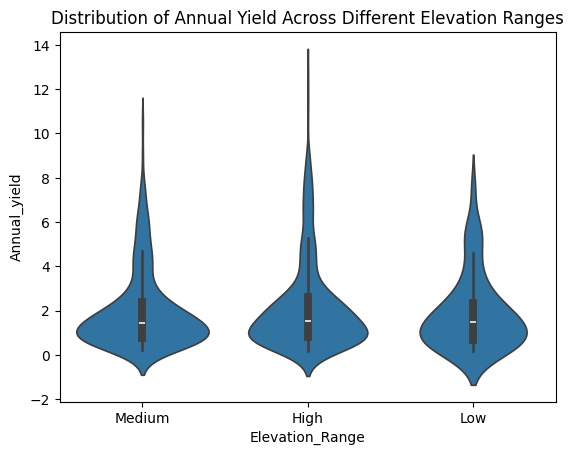

In [104]:
sns.violinplot(data=dataset, x="Elevation_Range", y="Annual_yield")
plt.title("Distribution of Annual Yield Across Different Elevation Ranges")
